<a href="https://colab.research.google.com/github/razaool/ML_Housing/blob/main/random_forest_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_excel('/content/final_housing_data.xlsx')
display(df.head())

,bathrooms,bedrooms,floorAreaSqM,livingRooms,history_price,tenure_Feudal,tenure_Freehold,tenure_Leasehold,tenure_Missing,tenure_Shared,...,currentEnergyRating_A,currentEnergyRating_B,currentEnergyRating_C,currentEnergyRating_D,currentEnergyRating_E,currentEnergyRating_F,currentEnergyRating_G,currentEnergyRating_Missing,outcode_encoded,days_since_sold
0,2,4,138,1,420000,False,True,False,False,False,...,False,False,True,False,False,False,False,False,3.944857e+05,936
1,1,1,41,1,355000,False,True,False,False,False,...,False,False,False,True,False,False,False,False,5.076869e+05,2051
2,1,2,77,1,155000,False,False,True,False,False,...,False,False,True,False,False,False,False,False,4.175679e+05,1212
3,1,4,115,1,830000,False,True,False,False,False,...,False,False,True,False,False,False,False,False,1.560819e+06,1272
4,1,3,85,1,475000,False,False,True,False,False,...,False,False,False,True,False,False,False,False,6.225024e+05,855


In [11]:
# Define features (X) and target (y)
features = df.drop('history_price', axis=1)
target = df['history_price']

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (127594, 39)
Target shape: (127594,)


In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (102075, 39)
X_test shape: (25519, 39)
y_train shape: (102075,)
y_test shape: (25519,)


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 237589.3823236408
Mean Squared Error (MSE): 1723581907426.1545
Root Mean Squared Error (RMSE): 1312852.5840421515
R-squared (R2 ): 0.3399712198893795


In [15]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Display the first few predictions
print("First 10 predictions:", predictions[:10])
print("Actual values:", y_test[:10].values)

First 10 predictions: [ 672190.86  364292.9   533870.    484382.59  640131.79 1012278.3
 1310845.    364350.    335175.5   529160.5 ]
Actual values: [ 590000  300500  700000  485000  231500  850000 1942000  400000  355000
  536000]


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution (can use the same grid as before)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
# n_iter controls the number of parameter combinations that are tried
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best negative MSE found: ", random_search.best_score_)

# The best estimator is the trained model with the best hyperparameters
best_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Best negative MSE found:  -590854341493.4673


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming random_search object is available from the previous step
# If not, you would need to re-run the RandomizedSearchCV cell

# The best estimator is the trained model with the best hyperparameters
best_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the best model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned) # Calculate RMSE
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Metrics for the tuned model:")
print(f"Mean Absolute Error (MAE): {mae_tuned}")
print(f"Mean Squared Error (MSE): {mse_tuned}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned}")
print(f"R-squared (R2 ): {r2_tuned}")

Metrics for the tuned model:
Mean Absolute Error (MAE): 230368.67878472529
Mean Squared Error (MSE): 1678856714810.1787
Root Mean Squared Error (RMSE): 1295707.0327856443
R-squared (R2 ): 0.35709829356968836


In [18]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the LightGBM Regressor model
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"Metrics for the LightGBM model:")
print(f"Mean Absolute Error (MAE): {mae_lgbm}")
print(f"Mean Squared Error (MSE): {mse_lgbm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm}")
print(f"R-squared (R2 ): {r2_lgbm}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 102075, number of used features: 35
[LightGBM] [Info] Start training from score 883887.549998
Metrics for the LightGBM model:
Mean Absolute Error (MAE): 238764.9056994073
Mean Squared Error (MSE): 1667285112881.7864
Root Mean Squared Error (RMSE): 1291233.949709264
R-squared (R2 ): 0.3615295249906122


In [19]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost Regressor model
# You can adjust hyperparameters here if needed
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Metrics for the XGBoost model:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R2 ): {r2_xgb}")

Metrics for the XGBoost model:
Mean Absolute Error (MAE): 234071.625
Mean Squared Error (MSE): 1726627971072.0
Root Mean Squared Error (RMSE): 1314012.1654961952
R-squared (R2 ): 0.3388047218322754


,Actual Price,Predicted Price,Percentage Error (%)
0,590000,6.636308e+05,12.479793
1,300500,3.572198e+05,18.875151
2,700000,6.299364e+05,10.009087
3,485000,4.878722e+05,0.592203
4,231500,3.963021e+05,71.188832
5,850000,1.100840e+06,29.510611
6,1942000,1.455061e+06,25.074100
7,400000,3.680743e+05,7.981416
8,355000,4.043140e+05,13.891256
9,536000,4.831437e+05,9.861258



Average Percentage Error over 20 houses: 15.83%


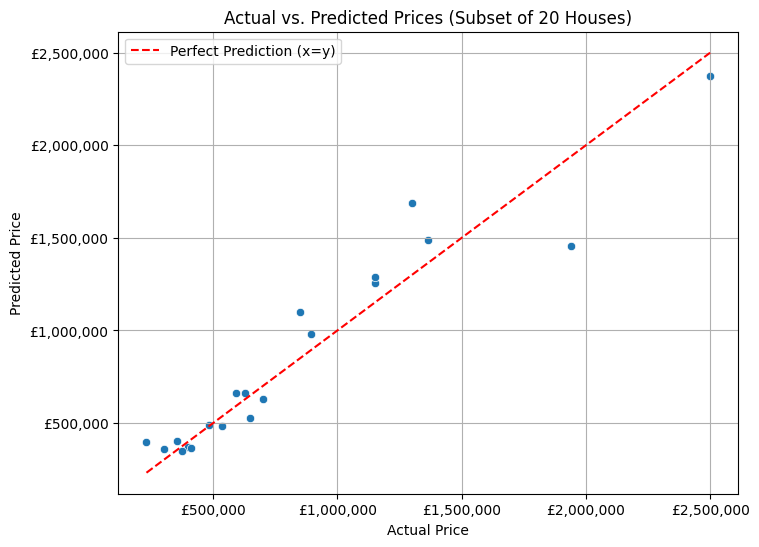

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker # Import for formatting

# Select the first 20 houses from the test set
X_test_subset = X_test[:20]
y_test_subset = y_test[:20]

# Make predictions on the subset
predictions_subset = lgbm_model.predict(X_test_subset)

# Create a DataFrame to display results
comparison_df_subset = pd.DataFrame({
    'Actual Price': y_test_subset.values,
    'Predicted Price': predictions_subset
})

# Calculate the absolute percentage error for each prediction
comparison_df_subset['Percentage Error (%)'] = np.abs((comparison_df_subset['Actual Price'] - comparison_df_subset['Predicted Price']) / comparison_df_subset['Actual Price']) * 100

# Display the results for the 20 houses
display(comparison_df_subset)

# Calculate the average percentage error
average_percentage_error = comparison_df_subset['Percentage Error (%)'].mean()
print(f"\nAverage Percentage Error over 20 houses: {average_percentage_error:.2f}%")

# Create a scatter plot of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=comparison_df_subset)

# Add the x=y line for perfect predictions
# Determine the minimum and maximum values for the line
min_price = min(comparison_df_subset['Actual Price'].min(), comparison_df_subset['Predicted Price'].min())
max_price = max(comparison_df_subset['Actual Price'].max(), comparison_df_subset['Predicted Price'].max())
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction (x=y)')

# Format the axis labels as monetary values with commas and GBP sign
def monetary_formatter(x, pos):
    return f'£{x:,.0f}' # Format as integer with comma and pound sign

formatter = mticker.FuncFormatter(monetary_formatter)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)


plt.title('Actual vs. Predicted Prices (Subset of 20 Houses)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.legend() # Show the legend to identify the x=y line
plt.show()